#Projeto MPV - Análise de Dados - Lilian Cunha Galdino

#Definição do problema

##    Identificação dos Fatores de Risco para Óbitos por SRAG, Incluindo COVID-19

### 1. Descrição do Problema
O objetivo da análise consiste em identificar os principais fatores de risco que estão mais fortemente associados ao óbito em pacientes com SRAG, incluindo os casos causados pela COVID-19. Isso inclui fatores demográficos (idade, gênero), comorbidades (hipertensão, diabetes, doenças cardíacas, etc.), e a influência de aspectos como vacinação e internação em UTI.

### 2. Premissas ou Hipóteses

**Premissas**
1. **Dados Completo e Preciso**: O dataset possui informações suficientes e precisas sobre variáveis-chave (idade, gênero, comorbidades, vacinação, etc.).
2. **Precisão dos Registros**: Os diagnósticos e desfechos clínicos foram registrados de forma consistente.
3. **Informações de Vacinação**: O dataset inclui dados sobre o status de vacinação dos pacientes.
4. **Representatividade Geográfica**: O dataset representa adequadamente diferentes regiões e populações do Brasil.

**Hipóteses**
1. **Idade e Mortalidade**: Pacientes mais velhos têm maior risco de óbito.
2. **Comorbidades**: Pacientes com comorbidades (diabetes, hipertensão, etc.) têm maior risco de mortalidade.
3. **Vacinação**: A vacinação reduz significativamente o risco de óbito.
4. **Sexo**: Homens têm maior risco de complicações graves e óbito do que mulheres.
5. **Localização Geográfica**: Áreas com menor infraestrutura de saúde têm maior taxa de mortalidade.
6. **Sazonalidade**: A mortalidade aumenta durante o inverno.
7. **Internação em UTI**: Pacientes que precisam de UTI ou ventilação mecânica têm maior risco de óbito.


### 3. Restrições ou Condições de Seleção de Dados

**Restrições**
1. **Qualidade dos Dados**
   - **Incompletude**: Dados podem estar incompletos para algumas variáveis, como comorbidades ou status de vacinação.
   - **Erros de Registro**: Possibilidade de erros ou inconsistências nos registros de diagnósticos, tratamentos e desfechos.

2. **Tempo de Coleta**
   - **Atualidade**: Dados podem não refletir a situação atual, especialmente se houve mudanças nas políticas de saúde ou novas variantes do vírus após a coleta.
   - **Cobertura Temporal**: Dados podem não cobrir todos os períodos de forma uniforme, com possíveis lacunas em certas épocas.

3. **Geografia e Representatividade**
   - **Diferenças Regionais**: Dados podem não representar adequadamente todas as regiões, especialmente áreas rurais ou menos cobertas por serviços de saúde.
   - **Variação na Infraestrutura**: Diferenças na capacidade de diagnóstico e tratamento entre regiões podem influenciar a qualidade e a comparabilidade dos dados.

4. **Variáveis Não Incluídas**
   - **Dados de Testagem**: A cobertura de testes para COVID-19 pode variar, afetando a precisão dos dados sobre a incidência.
   - **Dados sobre Vacinação**: Informações sobre a eficácia da vacina em diferentes variantes podem estar ausentes ou desatualizadas.

5. **Confidencialidade e Privacidade**
   - **Proteção de Dados**: Restrições relacionadas à privacidade podem limitar a capacidade de realizar análises detalhadas sobre indivíduos específicos ou subgrupos pequenos.

 **Condições de Seleção de Dados**
1. **Escopo de Inclusão**
   - **Casos Confirmados**: Selecionar apenas casos confirmados de SRAG e COVID-19 para garantir a precisão dos dados analisados.
   - **Dados Relevantes**: Incluir apenas registros com informações completas sobre variáveis críticas (idade, comorbidades, status de vacinação, etc.).

2. **Período de Análise**
   - **Janela Temporal**: Definir claramente o período de análise (por exemplo, de 2021 a 2024) para garantir que todos os dados sejam relevantes para o período de interesse.

3. **Filtro de Qualidade**
   - **Validação dos Dados**: Aplicar filtros para remover registros com dados faltantes ou inconsistentes que possam afetar a análise.

4. **Definições e Categorias**
   - **Uniformidade na Classificação**: Certificar-se de que as categorias e definições utilizadas (como comorbidades, status de vacinação) sejam consistentes em todo o dataset.

5. **Comparação e Benchmarking**
   - **Dados de Referência**: Utilizar benchmarks ou dados comparativos (por exemplo, taxas de mortalidade esperadas) para validar e interpretar os resultados da análise.



###4. Definição dos Atributos do Dataset

###5.Este é um problema de aprendizado supervisionado ou não supervisionado?

Ambos podem ser ultilizados, um exemplo de aprendizado supersionado seria: Prever ou identificar fatores de risco específicos que estão associados a um desfecho (neste caso, o óbito).
E um exemplo de não supervisionado seria: Explorar e identificar padrões ou grupos de dados sem usar rótulos predefinidos para desfechos.
A escolha entre aprendizado supervisionado e não supervisionado depende do objetivo específico da análise e da disponibilidade de rótulos nos dados. Para identificar fatores de risco específicos, o aprendizado supervisionado é geralmente mais direto e aplicável.

#Análise de dados

In [1]:
# importação do Pandas e gdown
import gdown
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler # normalização
from sklearn.preprocessing import StandardScaler # padronização
from sklearn.preprocessing import OrdinalEncoder # ordinal encoding
from sklearn.preprocessing import OneHotEncoder # one-hot encoding e dummy encoding

A importação se dá através de um arquivo CSV armazenado no git hub. O link fornecido (`url_dados`) é a URL direta (raw) do arquivo, permitindo carregar os dados diretamente em um ambiente de análise, usando bibliotecas como o `pandas` do Python. Isso permite que os dados sejam manipulados e analisados sem precisar baixá-los manualmente.

Este dataset contém 400 instâncias (linhas), 7 variáveis numéricas () e 5 variáveis categóricas ().

In [2]:
#Essa célula é a unica que apresenta demora para carregar devido ao tamanho dos datasets, demora cerca de 1 min
# Lista dos IDs dos arquivos no Google Drive
arquivos_drive = {
    '2021': '1gpFM84vEE7FL4zCKP7gYaNp5nGCTYo3c',
    '2022': '1czGZE5F4pHA1ykUwvhwUguezLpD8t7Ck',
    '2023': '1lZTDCue8rWLdhGcuLQ9KNqtRrk-rK4CV',
    '2024': '18BZMGAKriL2nkD-ongUC458NRg4swD3a'
}

# Colunas selecionadas
selecionar_colunas = ['DT_NOTIFIC', 'DT_SIN_PRI', 'SG_UF', 'SG_UF_NOT', 'ID_MUNICIP', 'CS_SEXO',
                      'DT_NASC', 'NU_IDADE_N', 'TP_IDADE', 'CS_GESTANT', 'CS_RACA', 'CS_ESCOL_N', 'ID_PAIS', 'ESTRANG', 'CS_ZONA', 'NOSOCOMIAL', 'AVE_SUINO', 'DOR_ABD', 'FADIGA',
                      'FEBRE', 'TOSSE', 'GARGANTA',	'DISPNEIA',	'DESC_RESP',	'SATURACAO',	'DIARREIA',	'VOMITO',	'OUTRO_SIN',	'PERD_OLFT', 'PERD_PALA', 'PUERPERA',	'FATOR_RISC',
                      'CARDIOPATI', 'HEMATOLOGI',	'SIND_DOWN',	'HEPATICA',	'ASMA',	'DIABETES',	'NEUROLOGIC',	'PNEUMOPATI',	'IMUNODEPRE',	'RENAL',	'OBESIDADE',
                      'VACINA', 'DT_UT_DOSE', 'VACINA_COV', 'DT_UT_DOSE', 'HOSPITAL', 'DT_INTERNA', 'UTI', 'SUPORT_VEN', 'CLASSI_FIN', 'EVOLUCAO', 'DT_EVOLUCA', 'DT_ENCERRA']



# Defina os tipos de dados para otimizar a leitura de CSV
dtypes = {
    'SG_UF_NOT': 'category',
    'ID_MUNICIP': 'category',
    'CS_SEXO': 'category'
    # 'NU_IDADE_N': 'int',
    # 'TP_IDADE': 'category',
    # 'CS_GESTANT': 'category',
    # 'CS_RACA': 'category',
    # 'CS_ESCOL_N': 'category',
    # 'ID_PAIS': 'category',
    # 'CS_ZONA': 'category',
    # 'NOSOCOMIAL': 'category',
    # 'AVE_SUINO': 'category',
    # 'FEBRE': 'category',
    # 'TOSSE': 'category',
    # 'GARGANTA': 'category',
    # 'DISPNEIA': 'category',
    # 'DESC_RESP': 'category',
    # 'SATURACAO': 'category',
    # 'DIARREIA': 'category',
    # 'VOMITO': 'category',
    # 'OUTRO_SIN': 'category',
    # 'PUERPERA': 'category',
    # 'FATOR_RISC': 'category',
    # 'CARDIOPATI': 'category',
    # 'HEMATOLOGI': 'category',
    # 'SIND_DOWN': 'category',
    # 'HEPATICA': 'category',
    # 'ASMA': 'category',
    # 'DIABETES': 'category',
    # 'NEUROLOGIC': 'category',
    # 'PNEUMOPATI': 'category',
    # 'IMUNODEPRE': 'category',
    # 'RENAL': 'category',
    # 'OBESIDADE': 'category',
    # 'VACINA': 'category',
    # 'VACINA_COV': 'category',
    # 'HOSPITAL': 'category',
    # 'UTI': 'category',
    # 'SUPORT_VEN': 'category',
    # 'RAIOX_RES': 'category',
    # 'AMOSTRA': 'category',
    # 'RES_AN': 'category',
    # 'POS_AN_FLU': 'category',
    # 'POS_AN_OUT': 'category',
    # 'PCR_RESUL': 'category',
    # 'POS_PCRFLU': 'category',
    # 'POS_PCROUT': 'category',
    # 'CRITERIO': 'category',
    # 'EVOLUCAO': 'category'
}

# Colunas que são datas
date_columns = ['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_NASC', 'DT_UT_DOSE', 'DT_INTERNA', 'DT_EVOLUCA']


# Lista para armazenar os DataFrames
dfs = []

# Loop para baixar e carregar cada arquivo
for ano, file_id in arquivos_drive.items():
    # Construa a URL para download
    url = f'https://drive.google.com/uc?id={file_id}'

    # Defina o nome do arquivo de saída
    output = f'INFLUD_{ano}.csv'

    if not os.path.exists(output):
        # Baixe o arquivo apenas se não existir localmente
        gdown.download(url, output, quiet=False)

    # Leia o arquivo CSV e selecione apenas as colunas especificadas
    df = pd.read_csv(output, sep=';', usecols=selecionar_colunas, dtype=dtypes, parse_dates=date_columns)

    # Filtrar as linhas onde 'EVOLUCAO' não está nulo
    df = df[df['EVOLUCAO'].notna()]

    # Verifica se o arquivo tem pelo menos 1200 linhas
    if len(df) >= 1000:
        # Seleciona 1000 linhas aleatórias
        df = df.sample(n=1000, random_state=42)
    else:
        print(f"O arquivo {output} tem menos de 1000 linhas. Selecionando todas as linhas.")

    # Adiciona uma coluna com o ano
    df['Ano'] = ano

    # Adiciona o DataFrame à lista
    dfs.append(df)

# Combine todos os DataFrames em um único DataFrame
SRAG = pd.concat(dfs, ignore_index=True)

# Total de linhas do DataFrame final
print(f'Total de linhas no DataFrame: {len(SRAG)}')

SRAG['DT_NOTIFIC'] = pd.to_datetime(SRAG['DT_NOTIFIC'], errors='coerce')
SRAG['DT_SIN_PRI'] = pd.to_datetime(SRAG['DT_SIN_PRI'], errors='coerce')
SRAG['DT_NASC'] = pd.to_datetime(SRAG['DT_NASC'], errors='coerce')
SRAG['DT_INTERNA'] = pd.to_datetime(SRAG['DT_INTERNA'], errors='coerce')
SRAG['DT_EVOLUCA'] = pd.to_datetime(SRAG['DT_EVOLUCA'], errors='coerce')
SRAG['DT_ENCERRA'] = pd.to_datetime(SRAG['DT_ENCERRA'], errors='coerce')
SRAG['Ano'] = SRAG['Ano'].astype(int)

Downloading...
From (original): https://drive.google.com/uc?id=1gpFM84vEE7FL4zCKP7gYaNp5nGCTYo3c
From (redirected): https://drive.google.com/uc?id=1gpFM84vEE7FL4zCKP7gYaNp5nGCTYo3c&confirm=t&uuid=fa41f643-0f83-4226-8ed0-879f2346e090
To: /content/INFLUD_2021.csv
100%|██████████| 1.02G/1.02G [00:27<00:00, 37.8MB/s]
<ipython-input-2-f79bb86a111d>:92: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv(output, sep=';', usecols=selecionar_colunas, dtype=dtypes, parse_dates=date_columns)
Downloading...
From (original): https://drive.google.com/uc?id=1czGZE5F4pHA1ykUwvhwUguezLpD8t7Ck
From (redirected): https://drive.google.com/uc?id=1czGZE5F4pHA1ykUwvhwUguezLpD8t7Ck&confirm=t&uuid=ab4a5dc1-b378-4211-9224-ef4ca7cc6d3d
To: /content/INFLUD_2022.csv
100%|██████████| 380M/380M [00:07<00:00, 54.2MB/s]
<ipython-input-2-f79bb86a111d>:92: UserWarning: Parsing dates in %d/%m/%

Total de linhas no DataFrame: 4000


<ipython-input-2-f79bb86a111d>:116: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  SRAG['DT_NOTIFIC'] = pd.to_datetime(SRAG['DT_NOTIFIC'], errors='coerce')
<ipython-input-2-f79bb86a111d>:117: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  SRAG['DT_SIN_PRI'] = pd.to_datetime(SRAG['DT_SIN_PRI'], errors='coerce')
<ipython-input-2-f79bb86a111d>:118: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  SRAG['DT_NASC'] = pd.to_datetime(SRAG['DT_NASC'], errors='coerce')
<ipython-input-2-f79bb86a111d>:119: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this wa

Inicialmente, iremos utilizar alguns comandos da biblioteca Pandas para exibir algumas estatísticas descritivas e fazer uma rápida análise exploratória do dataset. Os comentários nos blocos de código auxiliam no seu entendimento.

Quantos atributos e instâncias existem?

In [3]:
# exibindo as dimensões do dataset Quantos atributos e instâncias existem?
SRAG.shape

(4000, 55)

Quais são os tipos de dados dos atributos?

In [7]:
#verificando os tipos de cada coluna do dataframe
SRAG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 55 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DT_NOTIFIC  4000 non-null   datetime64[ns]
 1   DT_SIN_PRI  4000 non-null   datetime64[ns]
 2   SG_UF_NOT   4000 non-null   category      
 3   ID_MUNICIP  4000 non-null   object        
 4   CS_SEXO     4000 non-null   object        
 5   DT_NASC     3999 non-null   datetime64[ns]
 6   NU_IDADE_N  4000 non-null   int64         
 7   TP_IDADE    4000 non-null   int64         
 8   CS_GESTANT  4000 non-null   int64         
 9   CS_RACA     4000 non-null   float64       
 10  CS_ESCOL_N  2639 non-null   object        
 11  ID_PAIS     4000 non-null   object        
 12  SG_UF       4000 non-null   object        
 13  CS_ZONA     3661 non-null   float64       
 14  NOSOCOMIAL  3546 non-null   float64       
 15  AVE_SUINO   3436 non-null   float64       
 16  FEBRE       3452 non-nul

Verifique as primeiras linhas do dataset. Algo chama a atenção?
Sim, a quantidade de NaN

In [ ]:
# exibindo as primeiras linhas
SRAG.head()

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,ID_MUNICIP,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,...,DT_EVOLUCA,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,RES_AN,POS_AN_FLU,POS_AN_OUT,VACINA_COV,Ano
0,26/07/2021,20/07/2021,SP,SAO PAULO,M,30/06/2020,1,3,6,1,...,28/07/2021,2.0,2.0,2.0,2.0,4,NaN,NaN,2,2021
1,08/04/2021,05/04/2021,MS,PONTA PORA,F,21/09/2020,7,2,6,4,...,NaN,2.0,2.0,2.0,2.0,5,NaN,NaN,2,2021
2,22/07/2021,20/07/2021,PR,SAO MIGUEL DO IGUACU,M,28/07/2017,3,3,6,1,...,26/07/2021,2.0,2.0,2.0,2.0,5,NaN,NaN,2,2021
3,16/02/2021,04/02/2021,SP,PORTO FELIZ,M,12/11/1946,74,3,6,1,...,27/02/2021,2.0,1.0,2.0,2.0,5,NaN,NaN,NaN,2021
4,01/06/2021,25/05/2021,PE,SERRA TALHADA,M,26/06/1985,35,3,6,4,...,NaN,2.0,1.0,2.0,2.0,1,2,1,2,2021


In [7]:
# exibindo as últimas linhas
SRAG.tail()

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,ID_MUNICIP,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,...,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,ESTRANG,VACINA_COV,Ano
3995,2024-03-30,2024-03-02,RJ,DUQUE DE CAXIAS,F,2019-02-20,5,3,6,9.0,...,1.0,2024-03-13,NaT,2.0,2.0,2.0,2.0,2.0,2.0,2024
3996,2024-02-08,2024-02-08,CE,FORTALEZA,M,2021-08-02,2,3,6,4.0,...,1.0,2024-02-11,2024-11-02,2.0,2.0,2.0,9.0,2.0,2.0,2024
3997,2024-02-27,2024-02-11,DF,BRASILIA,M,2010-05-07,13,3,6,4.0,...,1.0,2024-03-16,NaT,NaN,NaN,NaN,NaN,2.0,2.0,2024
3998,2024-05-06,2024-04-28,RO,MACHADINHO D'OESTE,M,1963-05-23,60,3,6,2.0,...,1.0,NaT,NaT,2.0,2.0,1.0,2.0,NaN,1.0,2024
3999,2024-02-14,2024-02-12,SP,SOROCABA,F,1944-11-11,79,3,5,1.0,...,1.0,2024-02-23,NaT,1.0,1.0,NaN,NaN,2.0,1.0,2024


Há valores faltantes, discrepantes ou inconsistentes?
Sim, inclusive haviam valores faltantes em uma coluna essencial para a analise do problema, a de evolução, que indica se o paciencia teve alta ou obito.


In [8]:
valores_faltantes = SRAG.isna().sum()

# Filtrar colunas com mais de um valor faltante
colunas_vfaltantes = valores_faltantes[valores_faltantes > 1]
sorted_columns = colunas_vfaltantes.sort_values(ascending=False)
# Mostrar as colunas com mais de um valor faltante
print(sorted_columns)

DT_UT_DOSE    3787
PUERPERA      2691
HEPATICA      2678
HEMATOLOGI    2677
SIND_DOWN     2676
OBESIDADE     2659
IMUNODEPRE    2656
RENAL         2651
NEUROLOGIC    2634
ASMA          2630
PNEUMOPATI    2620
DIABETES      2517
DT_ENCERRA    2467
CARDIOPATI    2415
CS_ESCOL_N    1361
VACINA        1356
PERD_OLFT     1170
PERD_PALA     1170
OUTRO_SIN     1140
DOR_ABD       1136
DIARREIA      1095
VOMITO        1094
GARGANTA      1056
FADIGA        1044
SATURACAO      631
DESC_RESP      619
AVE_SUINO      564
FEBRE          548
DISPNEIA       529
SUPORT_VEN     499
ESTRANG        470
NOSOCOMIAL     454
UTI            440
TOSSE          364
CS_ZONA        339
DT_EVOLUCA     320
VACINA_COV     237
DT_INTERNA     217
HOSPITAL        83
CLASSI_FIN       3
dtype: int64


Faça um resumo estatístico dos atributos com valor numérico (mínimo, máximo, mediana, moda, média, desvio-padrão e número de valores ausentes). O que você percebe?

In [10]:
# exibindo um sumário estatístico
SRAG.describe(include='all')

,DT_NOTIFIC,DT_SIN_PRI,SG_UF_NOT,ID_MUNICIP,CS_SEXO,DT_NASC,NU_IDADE_N,TP_IDADE,CS_GESTANT,CS_RACA,...,EVOLUCAO,DT_EVOLUCA,DT_ENCERRA,DOR_ABD,FADIGA,PERD_OLFT,PERD_PALA,ESTRANG,VACINA_COV,Ano
count,4000,4000,4000,4000,4000,3999,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.0,3680,1533,2864.000000,2956.000000,2830.000000,2830.000000,3530.000000,3763.000000,4000.000000
unique,NaN,NaN,27,672,2,NaN,NaN,NaN,NaN,NaN,...,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,SP,SAO PAULO,M,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1110,311,2143,NaN,NaN,NaN,NaN,NaN,...,3103.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2022-11-23 12:56:31.200000,2022-11-15 09:50:02.399999744,NaN,NaN,NaN,1982-04-30 20:22:08.732183040,40.984250,2.818250,5.821000,3.305500,...,NaN,2022-11-23 03:38:20.869565184,2022-12-30 09:43:19.608610304,2.131285,1.918809,2.253004,2.269611,1.992635,1.974754,2022.500000
min,2021-01-05 00:00:00,2021-01-03 00:00:00,NaN,NaN,NaN,1916-08-05 00:00:00,0.000000,1.000000,0.000000,1.000000,...,NaN,2021-01-07 00:00:00,2021-01-03 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2021.000000
25%,2022-01-06 00:00:00,2022-01-01 18:00:00,NaN,NaN,NaN,1951-01-19 12:00:00,6.000000,3.000000,6.000000,1.000000,...,NaN,2022-01-04 18:00:00,2022-01-11 00:00:00,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2021.750000
50%,2023-01-04 12:00:00,2022-12-31 12:00:00,NaN,NaN,NaN,1977-02-03 00:00:00,45.000000,3.000000,6.000000,4.000000,...,NaN,2022-12-30 12:00:00,2022-12-07 00:00:00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2022.500000
75%,2024-01-06 00:00:00,2023-12-29 12:00:00,NaN,NaN,NaN,2020-07-06 00:00:00,71.000000,3.000000,6.000000,4.000000,...,NaN,2023-12-25 12:00:00,2024-01-02 00:00:00,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2023.250000
max,2024-08-28 00:00:00,2024-08-25 00:00:00,NaN,NaN,NaN,2024-08-23 00:00:00,105.000000,3.000000,9.000000,9.000000,...,NaN,2024-08-28 00:00:00,2024-12-08 00:00:00,9.000000,9.000000,9.000000,9.000000,2.000000,9.000000,2024.000000


In [34]:
#df_nulos = SRAG[(SRAG['DT_EVOLUCA'].isnull()) & (SRAG['DT_INTERNA'].isnull())] -verificar se datas de encerramento substituem a de evolução
df_nulos = SRAG[SRAG['DT_EVOLUCA'].isnull()]
# Exibindo o resultado
print(df_nulos[['DT_NOTIFIC', 'DT_SIN_PRI', 'DT_INTERNA', 'DT_EVOLUCA', 'EVOLUCAO', 'DT_ENCERRA', 'Ano']])

     DT_NOTIFIC DT_SIN_PRI DT_INTERNA DT_EVOLUCA EVOLUCAO DT_ENCERRA   Ano
1    2021-04-08 2021-04-05 2021-04-08        NaT      1.0 2021-12-04  2021
4    2021-06-01 2021-05-25 2021-05-31        NaT      9.0 2021-01-06  2021
22   2021-04-15 2021-04-15 2021-04-15        NaT      1.0        NaT  2021
47   2021-05-28 2021-05-12 2021-05-28        NaT      9.0        NaT  2021
59   2021-03-08 2021-03-02 2021-03-08        NaT      1.0        NaT  2021
...         ...        ...        ...        ...      ...        ...   ...
3966 2024-06-09 2024-06-06 2024-06-09        NaT      1.0        NaT  2024
3974 2024-03-13 2024-03-05 2024-03-13        NaT      1.0        NaT  2024
3983 2024-06-17 2024-06-16 2024-06-17        NaT      1.0        NaT  2024
3993 2024-05-13 2024-05-11 2024-05-13        NaT      1.0        NaT  2024
3998 2024-05-06 2024-04-28        NaT        NaT      1.0        NaT  2024

[320 rows x 7 columns]


In [18]:
# Calculando a diferença entre as datas de alta e internação
SRAG['DURACAO_INTERNA'] = (SRAG['DT_EVOLUCA'] - SRAG['DT_INTERNA']).dt.days

# Filtrando os valores não nulos para evitar erros no cálculo da média
duracao_valida = SRAG['DURACAO_INTERNA'].dropna()

# Calculando a média de dias de internação
media_dias_internacao = duracao_valida.mean()

print(f"A média de dias de internação é: {media_dias_internacao:.2f} dias.")

A média de dias de internação é: 9.77 dias.


In [ ]:
#Substituir data evolucao vazia

Analisei se existia chance dos valores em nulos em evolução serem devido ao caso ainda não ter encerrado, mas comparando os valores que estavam nulos, haviam casos que foram notificados em 2021, então acredito que era erro na base.


In [42]:
# Filtrando as linhas onde as colunas DT_EVOLUCA e EVOLUCAO estão nulas
df_filtrado = SRAG[SRAG['DT_EVOLUCA'].isnull()]

# Colunas com o ano de DT_SIN_PRI e DT_NOTIFIC
df_filtrado['ANO_DT_SIN_PRI'] = pd.to_datetime(df_filtrado['DT_SIN_PRI']).dt.year
df_filtrado['ANO_DT_NOTIFIC'] = pd.to_datetime(df_filtrado['DT_NOTIFIC']).dt.year

# Ordenando o DataFrame pela coluna EVOLUCAO
df_ordenado = df_filtrado.sort_values(by='EVOLUCAO')

# Exibir as primeiras 20 linhas
df_resultado = df_ordenado[['EVOLUCAO', 'ANO_DT_SIN_PRI', 'ANO_DT_NOTIFIC']].head(20)

print(df_resultado)


     EVOLUCAO  ANO_DT_SIN_PRI  ANO_DT_NOTIFIC
2068        9            2023            2023
1        Cura            2021            2021
2502     Cura            2023            2023
2505     Cura            2023            2023
2511     Cura            2023            2023
2556     Cura            2023            2023
2590     Cura            2023            2023
2596     Cura            2023            2023
2611     Cura            2023            2023
2640     Cura            2023            2023
2641     Cura            2023            2023
2674     Cura            2023            2023
2692     Cura            2023            2024
2717     Cura            2023            2023
2720     Cura            2023            2023
2721     Cura            2023            2023
2722     Cura            2023            2023
2724     Cura            2023            2023
2764     Cura            2023            2023
2781     Cura            2023            2023


<ipython-input-42-e10ce1ab536d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['ANO_DT_SIN_PRI'] = pd.to_datetime(df_filtrado['DT_SIN_PRI']).dt.year
<ipython-input-42-e10ce1ab536d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['ANO_DT_NOTIFIC'] = pd.to_datetime(df_filtrado['DT_NOTIFIC']).dt.year


In [11]:
#Verificando se há datas incoerentes com o contexto do arquivo
datas_min_max = {
    'DT_NOTIFIC': [SRAG['DT_NOTIFIC'].min(), SRAG['DT_NOTIFIC'].max()],
    'DT_SIN_PRI': [SRAG['DT_SIN_PRI'].min(), SRAG['DT_SIN_PRI'].max()],
    'DT_NASC': [SRAG['DT_NASC'].min(), SRAG['DT_NASC'].max()],
    'DT_INTERNA': [SRAG['DT_INTERNA'].min(), SRAG['DT_INTERNA'].max()],
    'DT_EVOLUCA': [SRAG['DT_EVOLUCA'].min(), SRAG['DT_EVOLUCA'].max()]
}

# Transformar o dicionário em um DataFrame para visualização
df_datas_min_max = pd.DataFrame(datas_min_max, index=['Data Mínima', 'Data Máxima'])

# Exibir o resultado
print(df_datas_min_max)

            DT_NOTIFIC DT_SIN_PRI    DT_NASC DT_INTERNA DT_EVOLUCA
Data Mínima 2021-01-05 2021-01-03 1916-08-05 2020-11-29 2021-01-07
Data Máxima 2024-08-28 2024-08-25 2024-08-23 2024-08-27 2024-08-28


In [9]:
print(SRAG[SRAG['NU_IDADE_N'] < 0])  # Valores negativos quando não deveriam existir
print(SRAG[SRAG['NU_IDADE_N'] > 120])  # Valores maiores que um limite superior
#verificar idade max e min

Empty DataFrame
Columns: [DT_NOTIFIC, DT_SIN_PRI, SG_UF_NOT, ID_MUNICIP, CS_SEXO, DT_NASC, NU_IDADE_N, TP_IDADE, CS_GESTANT, CS_RACA, CS_ESCOL_N, ID_PAIS, SG_UF, CS_ZONA, NOSOCOMIAL, AVE_SUINO, FEBRE, TOSSE, GARGANTA, DISPNEIA, DESC_RESP, SATURACAO, DIARREIA, VOMITO, OUTRO_SIN, PUERPERA, FATOR_RISC, CARDIOPATI, HEMATOLOGI, SIND_DOWN, HEPATICA, ASMA, DIABETES, NEUROLOGIC, PNEUMOPATI, IMUNODEPRE, RENAL, OBESIDADE, VACINA, DT_UT_DOSE, HOSPITAL, DT_INTERNA, UTI, SUPORT_VEN, CLASSI_FIN, EVOLUCAO, DT_EVOLUCA, DT_ENCERRA, DOR_ABD, FADIGA, PERD_OLFT, PERD_PALA, ESTRANG, VACINA_COV, Ano]
Index: []

[0 rows x 55 columns]
Empty DataFrame
Columns: [DT_NOTIFIC, DT_SIN_PRI, SG_UF_NOT, ID_MUNICIP, CS_SEXO, DT_NASC, NU_IDADE_N, TP_IDADE, CS_GESTANT, CS_RACA, CS_ESCOL_N, ID_PAIS, SG_UF, CS_ZONA, NOSOCOMIAL, AVE_SUINO, FEBRE, TOSSE, GARGANTA, DISPNEIA, DESC_RESP, SATURACAO, DIARREIA, VOMITO, OUTRO_SIN, PUERPERA, FATOR_RISC, CARDIOPATI, HEMATOLOGI, SIND_DOWN, HEPATICA, ASMA, DIABETES, NEUROLOGIC, PNEUMOP

In [37]:
SRAG['Ano_Nascimento'] = SRAG['DT_NASC'].dt.year

# Função para calcular a diferença exata em meses
def calcular_diferenca_meses(data_notific, data_nasc):
    delta = (data_notific.year - data_nasc.year) * 12 + (data_notific.month - data_nasc.month)
    # Se o dia de nascimento for maior que o dia da notificação, subtraímos 1 mês
    if data_notific.day < data_nasc.day:
        delta -= 1
    return delta

# Função para calcular a diferença em anos (como antes) e dias
SRAG['Idade_Ajustada'] = 0  # Inicializar com 0 para evitar erros

# Caso TP_IDADE = 3 (em anos)
SRAG.loc[SRAG['TP_IDADE'] == 3, 'Idade_Ajustada'] = (SRAG['DT_NOTIFIC'] - SRAG['DT_NASC']).dt.days / 365.25

# Caso TP_IDADE = 2 (em meses) - Usando a função de diferença de meses
SRAG.loc[SRAG['TP_IDADE'] == 2, 'Idade_Ajustada'] = SRAG.apply(
    lambda row: calcular_diferenca_meses(row['DT_NOTIFIC'], row['DT_NASC']) if pd.notnull(row['DT_NOTIFIC']) and pd.notnull(row['DT_NASC']) else np.nan,
    axis=1
)

# Caso TP_IDADE = 1 (em dias)
SRAG.loc[SRAG['TP_IDADE'] == 1, 'Idade_Ajustada'] = (SRAG['DT_NOTIFIC'] - SRAG['DT_NASC']).dt.days

# Preencher valores não finitos (NaT ou NaN) com 0 ou outro valor adequado
SRAG['Idade_Ajustada'] = SRAG['Idade_Ajustada'].fillna(0)

# Truncar a diferença para o número inteiro, sem arredondamento
SRAG['Idade_Ajustada'] = SRAG['Idade_Ajustada'].astype(int)

# Filtrar as inconsistências de idade
inconsistencias_idade = SRAG[SRAG['NU_IDADE_N'] != SRAG['Idade_Ajustada']]
inconsistencias_idade = inconsistencias_idade[['DT_NASC', 'DT_NOTIFIC', 'TP_IDADE', 'NU_IDADE_N', 'Idade_Ajustada']]

# Exibir o resultado
print(inconsistencias_idade)


        DT_NASC DT_NOTIFIC  TP_IDADE  NU_IDADE_N  Idade_Ajustada
1    2020-09-21 2021-04-08         2           7               6
39   1950-03-04 2021-03-07         3          70              71
42   2021-05-05 2021-06-07         1          20              33
89   1944-01-09 2021-01-09         3          76              77
126  2021-03-17 2021-05-06         2           2               1
...         ...        ...       ...         ...             ...
3943 2023-12-26 2024-03-11         2           3               2
3962 2024-04-26 2024-05-23         2           1               0
3981 2023-05-25 2024-02-21         2           9               8
3989 2024-04-28 2024-07-18         2           3               2
3993 1971-05-13 2024-05-13         3          52              53

[383 rows x 5 columns]


<ipython-input-37-5d32b828879c>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.07049966  3.9835729  74.2642026  ... 13.80971937 60.95550992
 79.25804244]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  SRAG.loc[SRAG['TP_IDADE'] == 3, 'Idade_Ajustada'] = (SRAG['DT_NOTIFIC'] - SRAG['DT_NASC']).dt.days / 365.25


In [38]:
filtro = SRAG[(SRAG['NU_IDADE_N'] != SRAG['Idade_Ajustada']) & (SRAG['NU_IDADE_N'] == 0)]
inconsistencias_idade = filtro[['DT_NASC', 'DT_NOTIFIC', 'TP_IDADE', 'NU_IDADE_N', 'Idade_Ajustada']]

# Exibir o resultado
print(inconsistencias_idade)

        DT_NASC DT_NOTIFIC  TP_IDADE  NU_IDADE_N  Idade_Ajustada
1311 2022-12-24 2022-12-26         1           0               2
1873 2022-07-08 2022-07-12         1           0               4
2084 2023-01-23 2023-07-20         1           0             178
2612 2022-01-26 2023-01-19         2           0              11
2653 2022-07-18 2023-07-22         2           0              12
2859 2022-07-17 2023-07-13         2           0              11
3139 2023-05-20 2024-05-20         2           0              12
3452 2023-07-28 2024-07-18         2           0              11
3773 2023-08-12 2024-08-26         2           0              12
3861 2023-02-24 2024-02-08         2           0              11


Verifique a distribuição de cada atributo. O que você percebe? Dica: esta etapa pode dar ideias sobre a necessidade de transformações na etapa de preparação de dados (por exemplo, converter atributos de um tipo para outro, realizar operações de discretização, normalização, padronização, etc.).

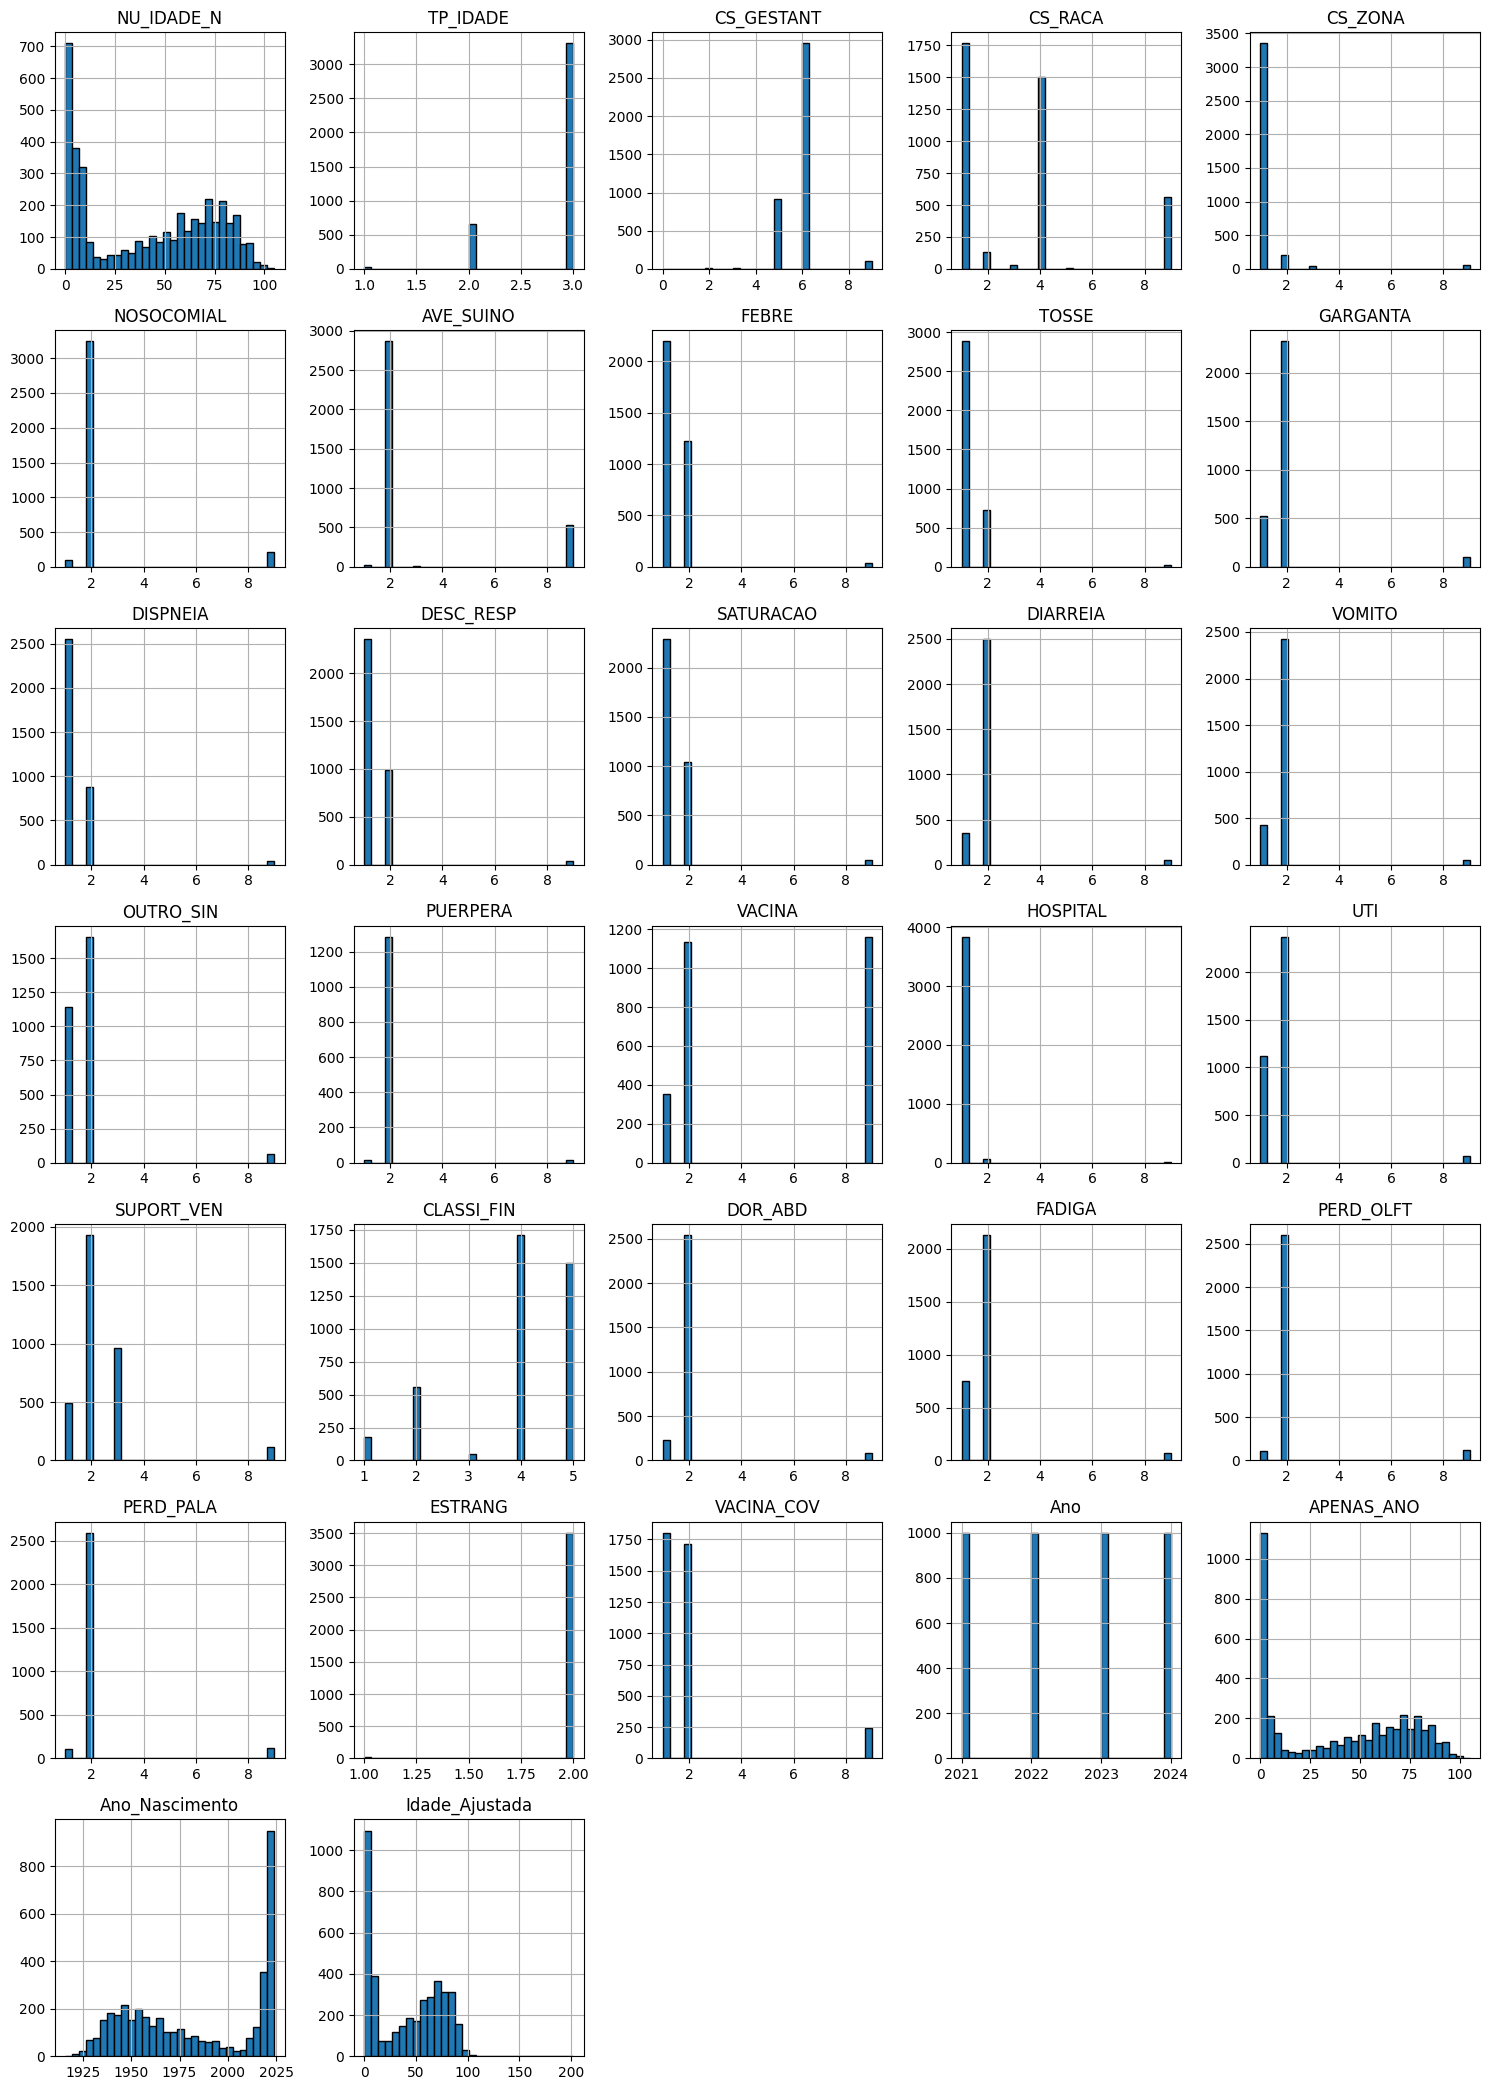

In [40]:
# Filtrando apenas colunas numéricas para os histogramas
numeric_columns = SRAG.select_dtypes(include=['float64', 'int64']).columns

# Definindo o número de colunas que você quer mostrar por vez (ajuste conforme necessário)
num_cols = 5  # Número de gráficos por linha
num_rows = len(numeric_columns) // num_cols + 1  # Calcula o número de linhas necessárias

# Plotando os histogramas
SRAG[numeric_columns].hist(bins=30, figsize=(15, num_rows * 3), layout=(num_rows, num_cols), edgecolor='black')

# Ajustando o layout para evitar sobreposição
plt.tight_layout()
plt.show()


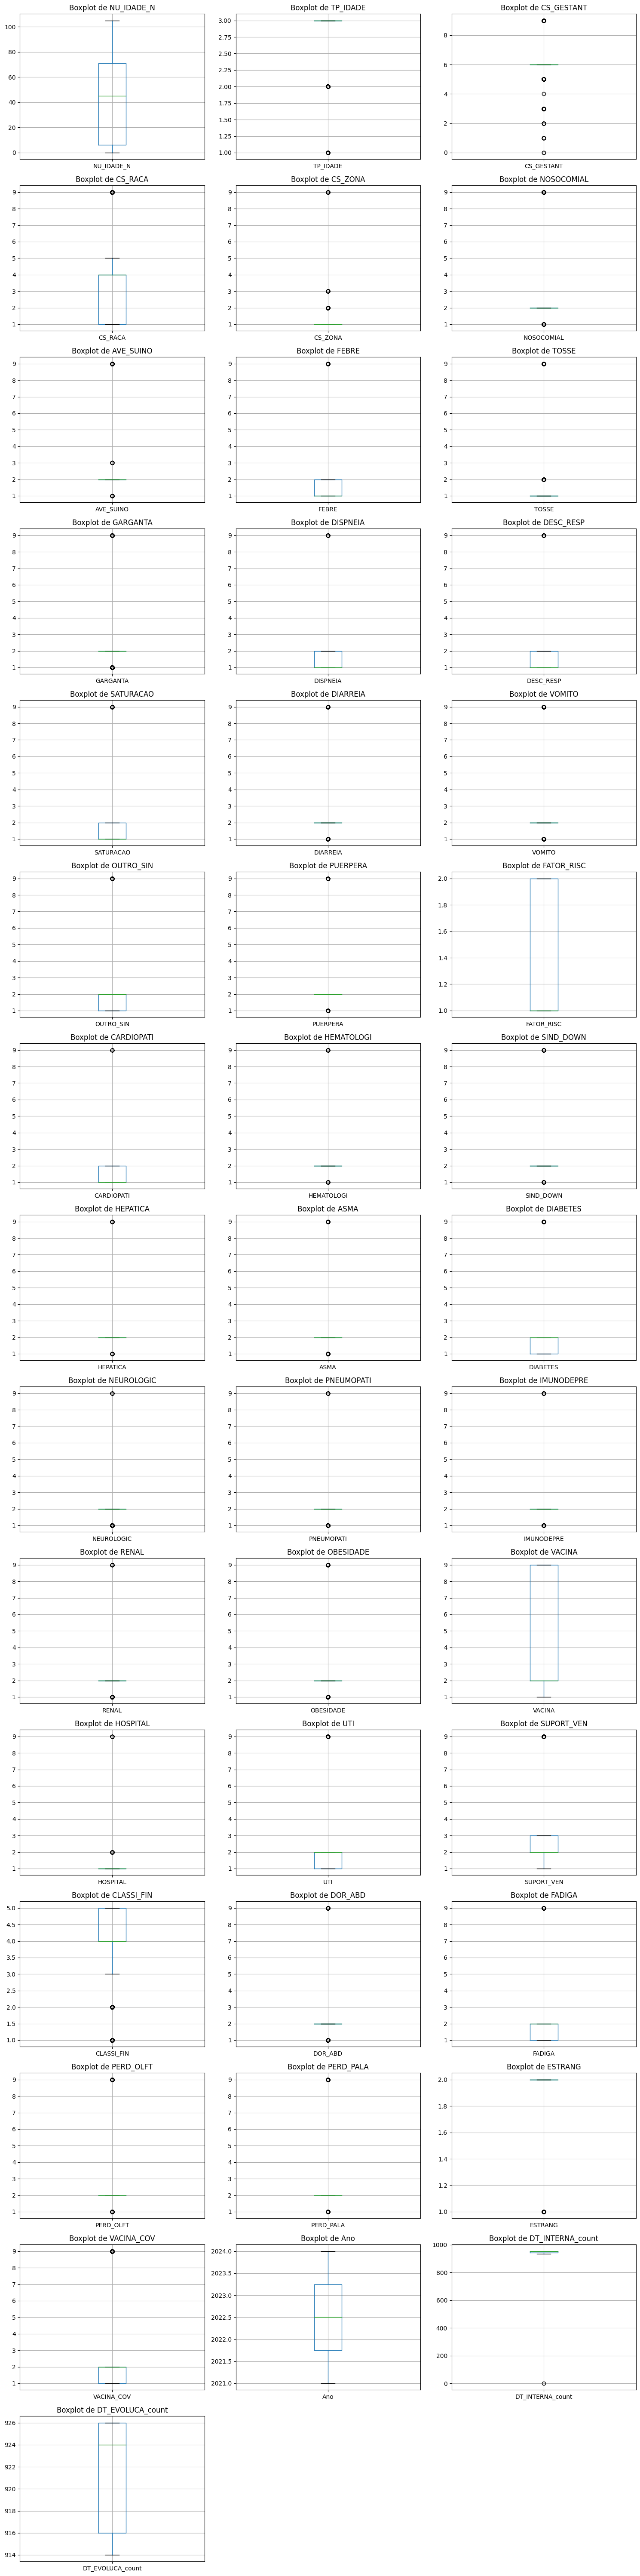

In [15]:
# Selecionando apenas as colunas numéricas do dataset
colunas_numericas = SRAG.select_dtypes(include=['float64', 'int64']).columns

# Definindo o tamanho da figura e o layout
num_colunas = len(colunas_numericas)
num_linhas = (num_colunas // 3) + 1  # Definindo o número de linhas, com 3 colunas por linha

# Criando subplots
fig, axes = plt.subplots(num_linhas, 3, figsize=(15, num_linhas * 4))
axes = axes.flatten()  # Para iterar sobre os eixos com facilidade

# Plotando um boxplot para cada coluna numérica
for i, coluna in enumerate(colunas_numericas):
    SRAG.boxplot(column=coluna, ax=axes[i])
    axes[i].set_title(f'Boxplot de {coluna}')
    axes[i].set_xlabel('')

# Removendo os eixos que não possuem gráficos (caso sobre espaço)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Ajustando o layout para melhor visualização
plt.tight_layout()
plt.show()


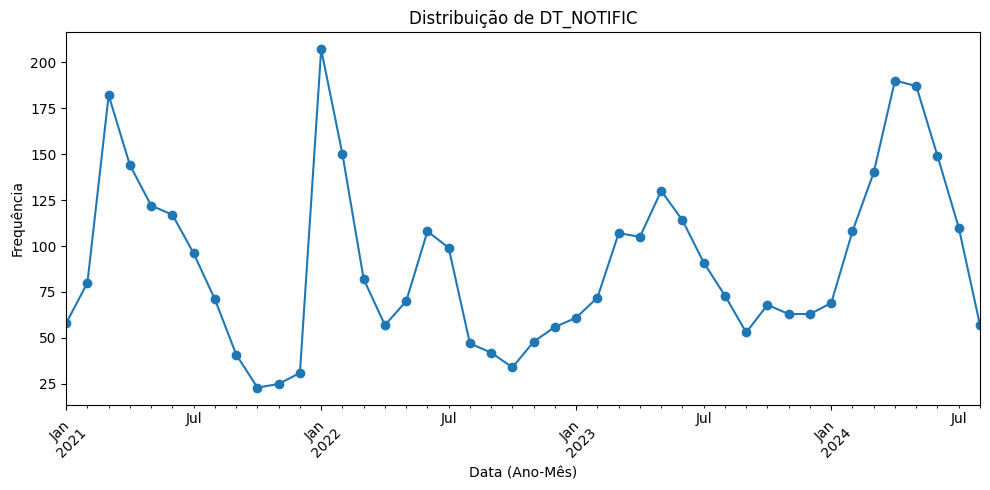

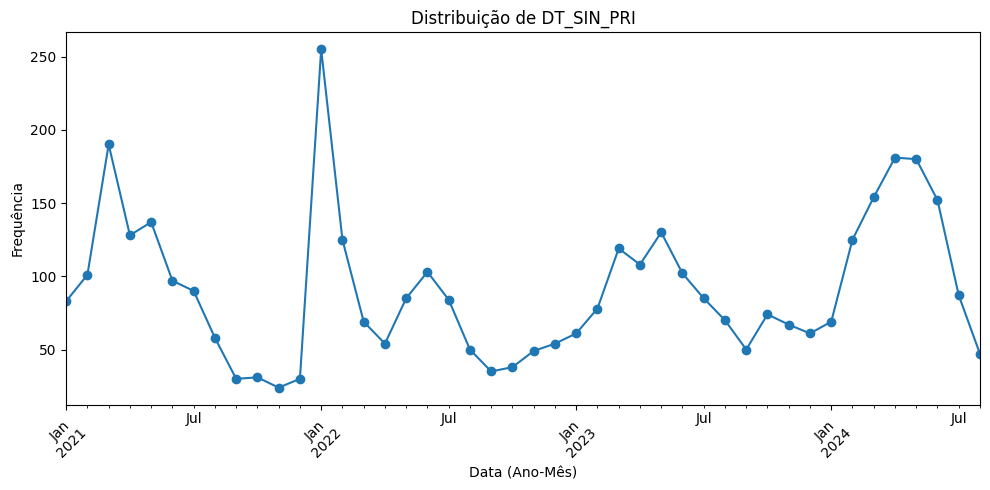

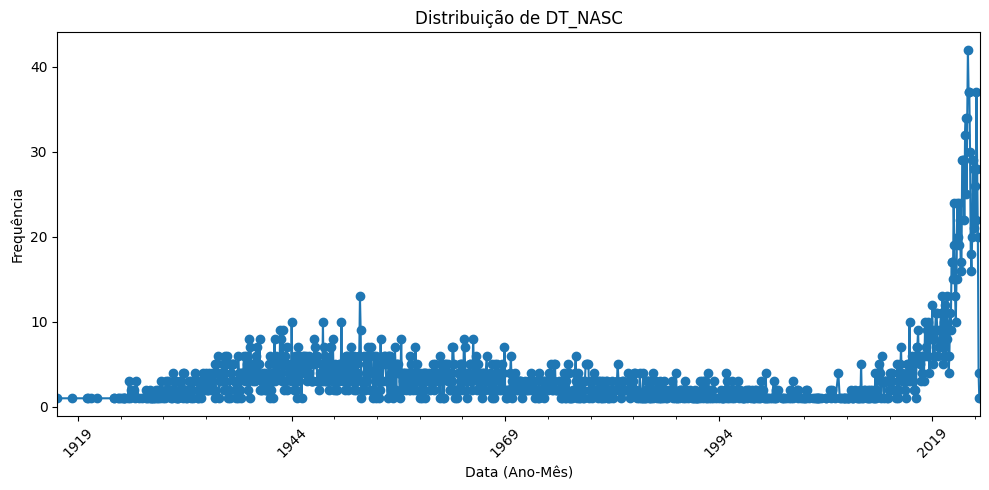

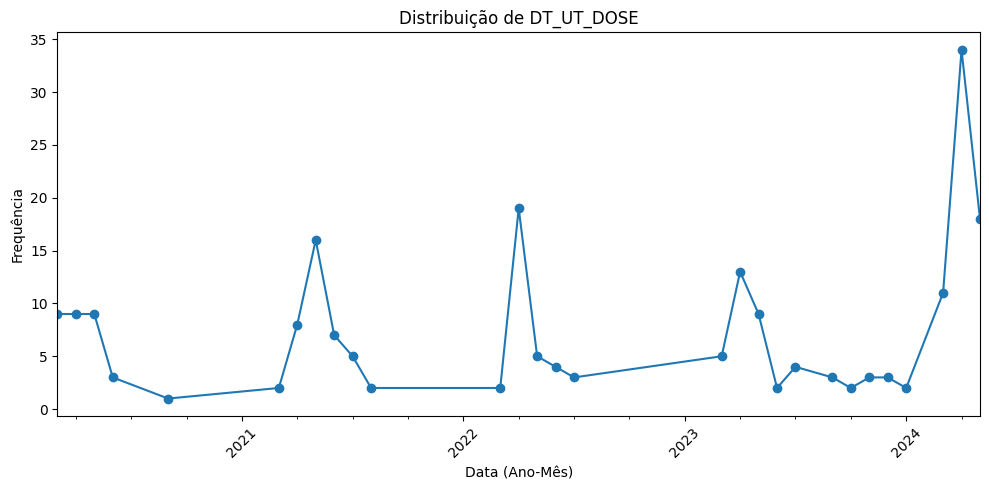

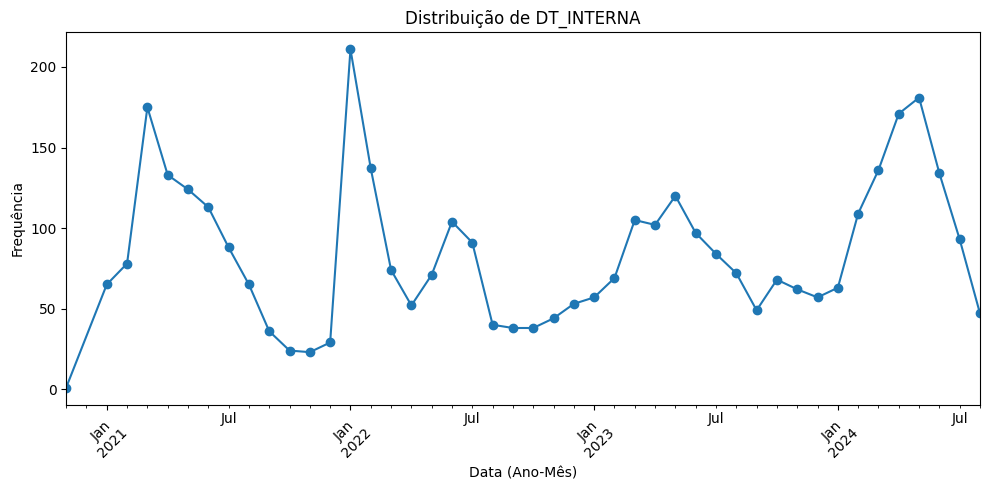

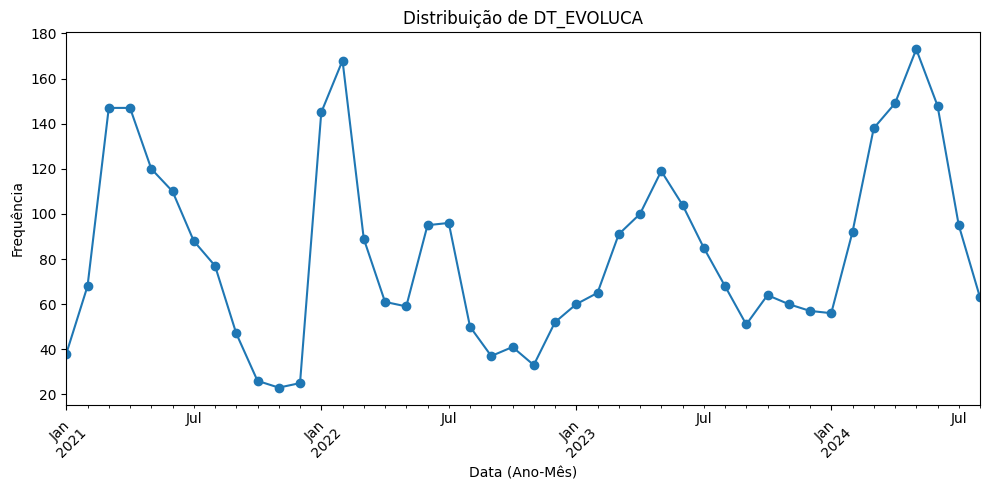

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

date_columns = date_columns  # Ajuste com as suas colunas de datas

# Convertendo para datetime se ainda não estiver no formato correto
SRAG[date_columns] = SRAG[date_columns].apply(pd.to_datetime, errors='coerce')

# Criando um gráfico de linhas para cada coluna de data
for col in date_columns:
    SRAG[col].groupby(SRAG[col].dt.to_period("M")).count().plot(kind='line', figsize=(10, 5), marker='o', title=f"Distribuição de {col}")
    plt.xlabel('Data (Ano-Mês)')
    plt.ylabel('Frequência')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


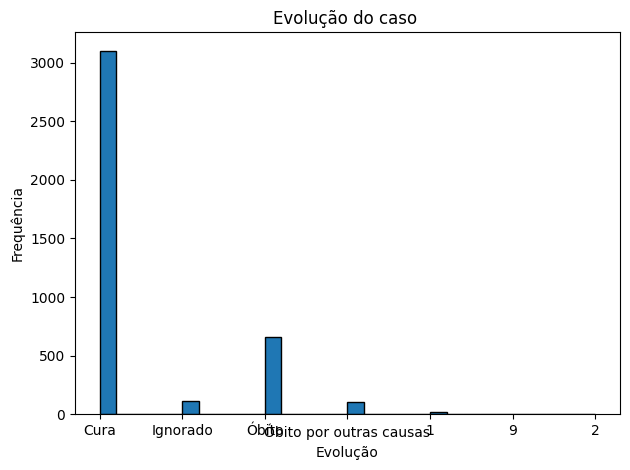

In [57]:
# Convertendo a coluna EVOLUCAO para identificar óbitos (considerando 2 como óbito)
SRAG['EVOLUCAO'] = SRAG['EVOLUCAO'].replace({1: 'Cura', 2: 'Óbito', 3: 'Óbito Outros', 9: 'Ignorado'})

# Filtrando apenas os casos relevantes para óbito (EVOLUCAO == 'Óbito')
df_orbito = SRAG[SRAG['EVOLUCAO'] == 'Óbito']

plt.hist(SRAG['EVOLUCAO'].dropna(), bins=30, edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Evolução')
plt.ylabel('Frequência')
plt.title('Evolução do caso ')
plt.tight_layout()
# Mostrar o gráfico
plt.show()

In [43]:
# Criar uma cópia da coluna 'NU_IDADE_N'
SRAG['IDADE_DUPLICADA'] = SRAG['Idade_Ajustada'].astype(str)  # Converter para string para concatenação

# Substituir os valores de 'TP_IDADE'
SRAG['TP_IDADE_LABEL'] = SRAG['TP_IDADE'].replace({
    1: 'Dia',
    2: 'Mês',
    3: 'Ano'
})

# Concatenar 'NU_IDADE_N_DUPLICADA' com 'TP_IDADE_LABEL'
SRAG['IDADE_CONCATENADA'] = SRAG['IDADE_DUPLICADA'] + ' ' + SRAG['TP_IDADE_LABEL']

# Verificar o resultado
print(SRAG[['NU_IDADE_N', 'TP_IDADE', 'IDADE_CONCATENADA']].head())


   NU_IDADE_N  TP_IDADE IDADE_CONCATENADA
0           1         3             1 Ano
1           7         2             6 Mês
2           3         3             3 Ano
3          74         3            74 Ano
4          35         3            35 Ano


In [34]:
#Criando uma cópia da coluna de idade para rever os casos na maioria que estão como 0
SRAG['APENAS_ANO'] = SRAG['NU_IDADE_N']
SRAG.loc[SRAG['TP_IDADE'].isin([1, 2]), 'APENAS_ANO'] = 0

# Verificar o resultado
print(SRAG[['APENAS_ANO', 'TP_IDADE', 'NU_IDADE_N']].head())

   APENAS_ANO  TP_IDADE  NU_IDADE_N
0           1         3           1
1           0         2           7
2           3         3           3
3          74         3          74
4          35         3          35


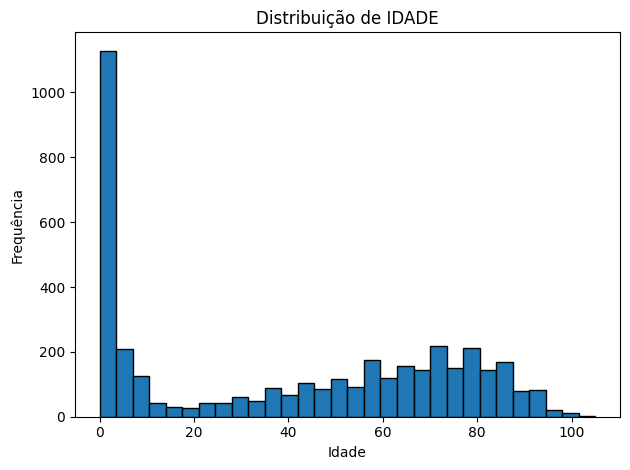

In [44]:
plt.hist(SRAG['APENAS_ANO'].dropna(), bins=30, edgecolor='black')

# Adicionar rótulos e título
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de IDADE')
plt.tight_layout()
# Mostrar o gráfico
plt.show()

<ipython-input-45-4375624fa37c>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette='viridis')


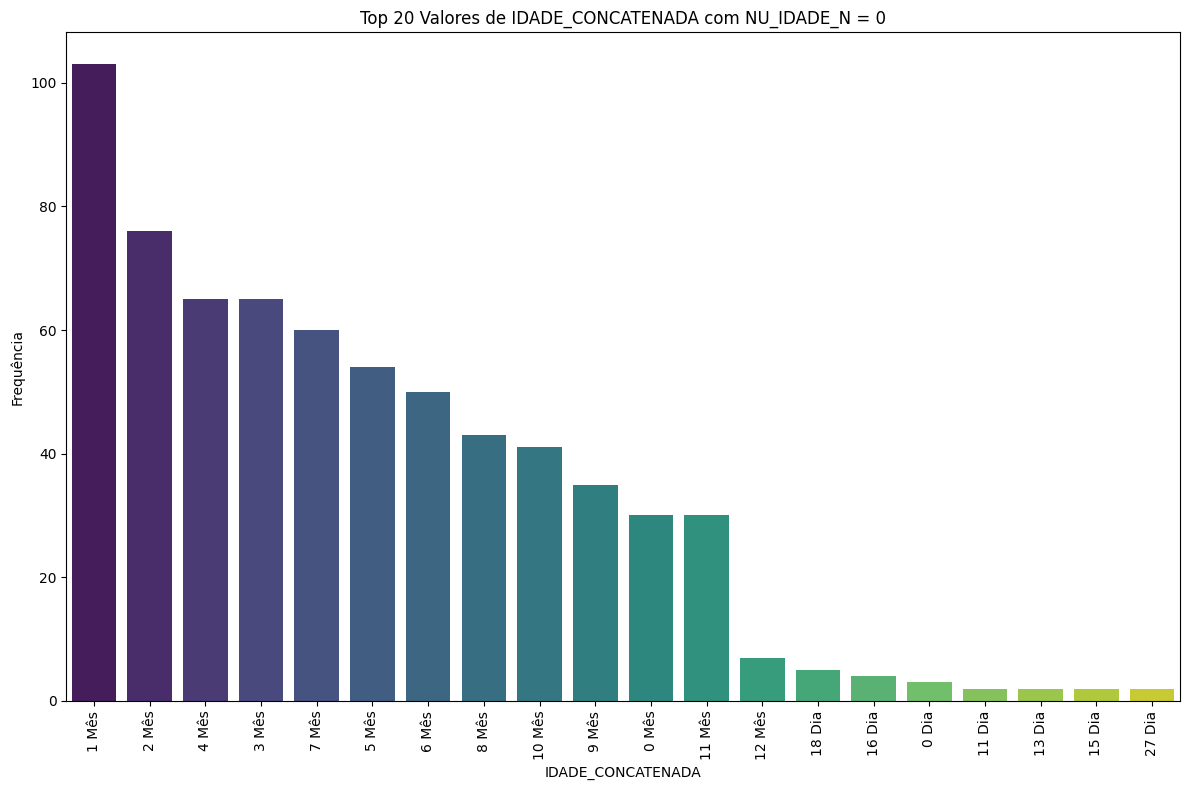

In [45]:
# Dentre os valores com 0 na idade, temos: Vendo no detalhe o tempo de vida das pessoas com 0 de idade

filtered_data = SRAG[SRAG['APENAS_ANO'] == 0]

# Contar a frequência de cada valor em 'NU_IDADE_N_CONCATENADA'
count_data = filtered_data['IDADE_CONCATENADA'].value_counts()

# Obter os 20 valores mais frequentes
top_20 = count_data.head(20)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20.index, y=top_20.values, palette='viridis')

# Adicionar rótulos e título
plt.xlabel('IDADE_CONCATENADA')
plt.ylabel('Frequência')
plt.title('Top 20 Valores de IDADE_CONCATENADA com NU_IDADE_N = 0')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x para melhor visualização

# Mostrar o gráfico
plt.tight_layout()
plt.show()

#verificar porque existem 0 dia e 0 mês, e tentar corrigir

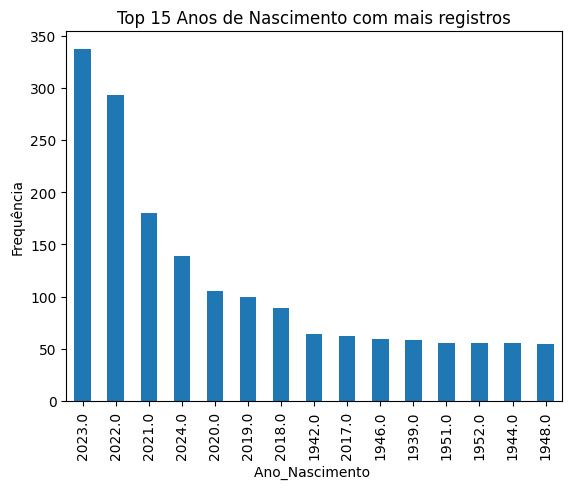

In [59]:
# Extrair o ano ou mês e contar a frequência
#Pessoas de 2023 são as mais afetadas, mais do que nasceu antes de 50
top_10 = SRAG['Ano_Nascimento'].value_counts().nlargest(15)

top_10.plot(kind='bar')
plt.xlabel('Ano_Nascimento ')
plt.ylabel('Frequência')
plt.title('Top 15 Anos de Nascimento com mais registros')
plt.show()




<ipython-input-49-f10a944d7965>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_25_obitos.index, y=top_25_obitos.values, order=top_25_obitos.index, palette='Blues_d')


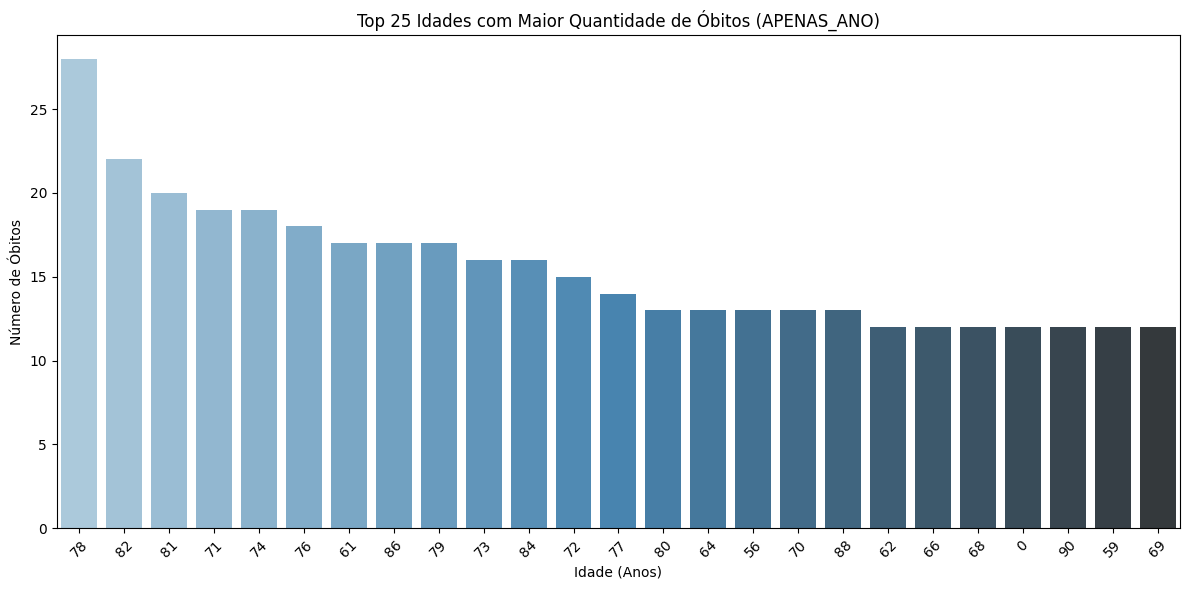

In [49]:
#Idade com maior quantidade de obito

obitos_por_idade = df_orbito['APENAS_ANO'].value_counts()

# Selecionando os top 25 idades com maior quantidade de óbitos em ordem decrescente
top_25_obitos = obitos_por_idade.nlargest(25)

# Criando o gráfico de barras para os top 25
plt.figure(figsize=(12, 6))
sns.barplot(x=top_25_obitos.index, y=top_25_obitos.values, order=top_25_obitos.index, palette='Blues_d')

plt.title('Top 25 Idades com Maior Quantidade de Óbitos (APENAS_ANO)')
plt.xlabel('Idade (Anos)')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

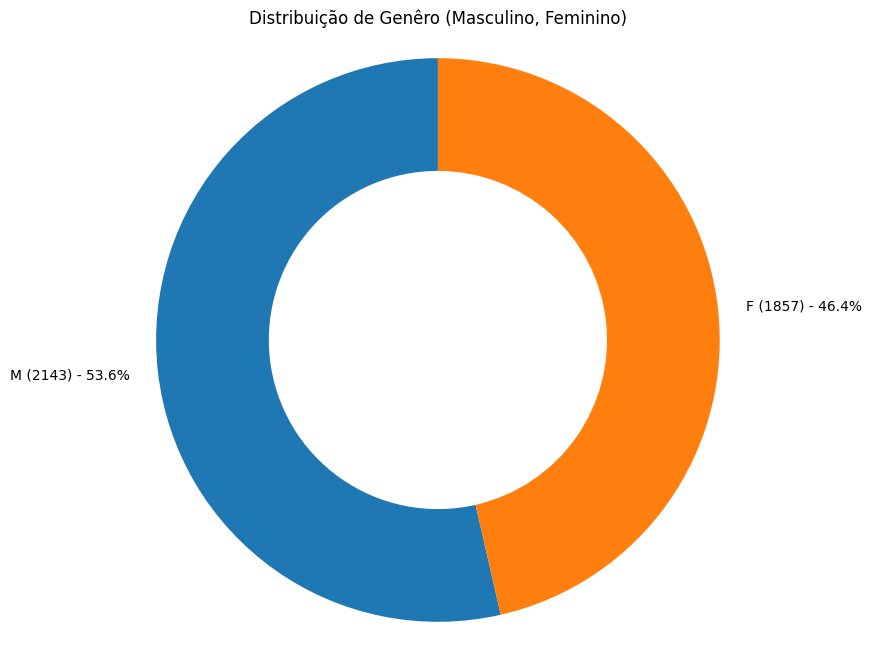

In [ ]:
# Conta o número de valores não nulos em cada coluna
#SRAG.CS_SEXO.value_counts(normalize=True).plot(kind='bar')

# Contar os valores únicos na coluna 'FATOR_RISC'
sexo_counts = SRAG['CS_SEXO'].value_counts()

# Criar os rótulos personalizados: categoria, quantidade e porcentagem
labels = [f'{cat} ({count}) - {count / sexo_counts.sum() * 100:.1f}%'
          for cat, count in zip(sexo_counts.index, sexo_counts.values)]

# Criar o gráfico de rosca (pie chart com um buraco no meio)
plt.figure(figsize=(8, 8))
plt.pie(sexo_counts, labels=labels, startangle=90, wedgeprops={'width': 0.4})

# Ajustar a proporção para garantir que o gráfico seja um círculo
plt.axis('equal')

# Adicionar título
plt.title('Distribuição de Genêro (Masculino, Feminino)')

# Configurar o fundo cinza claro atrás das letras (rótulos)
plt.gca().set_facecolor('lightgray')

# Exibir o gráfico
plt.show()



In [63]:

# Contando óbitos por sexo
obitos_por_sexo = df_orbito['CS_SEXO'].value_counts()

# Contando a quantidade de riscos por sexo (exemplo com a primeira coluna de riscos)
riscos_por_sexo = SRAG.groupby('CS_SEXO')[colunas_riscos].apply(lambda x: (x == 'Sim').sum())

# Criando um DataFrame para facilitar a visualização
data = pd.DataFrame({
    'Óbitos': obitos_por_sexo,
    'Riscos': riscos_por_sexo
})

# Resetando o índice para que CS_SEXO seja uma coluna
data.reset_index(inplace=True)

# Derretendo o DataFrame para o seaborn
data_melted = data.melt(id_vars='CS_SEXO', var_name='Categoria', value_name='Quantidade')

# Criando o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=data_melted, x='CS_SEXO', y='Quantidade', hue='Categoria', palette='Set2')

plt.title('Comparação de Riscos e Óbitos entre Homens e Mulheres')
plt.xlabel('Sexo')
plt.ylabel('Quantidade')
plt.xticks(rotation=0)
plt.legend(title='Categoria')
plt.tight_layout()
plt.show()



ValueError: Data must be 1-dimensional, got ndarray of shape (2, 11) instead

<ipython-input-58-28b3fa532909>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_feminino['CS_GESTANT_LABEL'] = df_feminino['CS_GESTANT'].map(mapeamento_gestant)
<ipython-input-58-28b3fa532909>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contagem.index, y=contagem.values, palette='Blues')


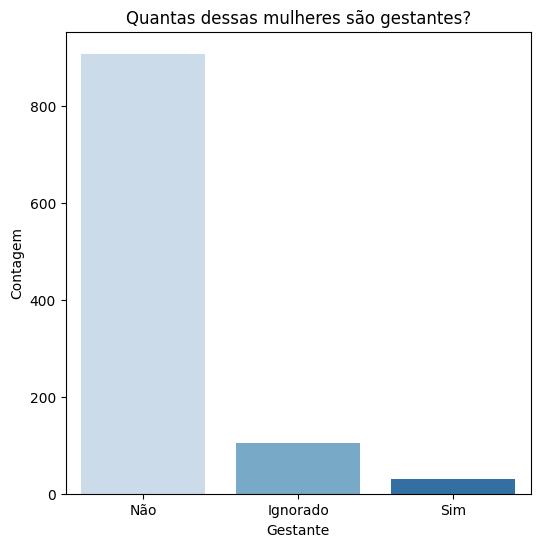

In [ ]:
# Filtrar o DataFrame para incluir apenas as linhas onde CS_SEXO é 'F' e revendo valores não se aplica, que se refere a meninas menores de 9 anos -> mehor grafico de rosca
df_feminino = SRAG[(SRAG['CS_SEXO'] == 'F') & (SRAG['CS_GESTANT'] != 6)]

# Criar um dicionário para mapear os valores de CS_GESTANT
mapeamento_gestant = {
    1: 'Sim',
    2: 'Sim',
    3: 'Sim',
    4: 'Sim',
    5: 'Não',
    9: 'Ignorado'
}

# Substituir os valores de CS_GESTANT usando o mapeamento
df_feminino['CS_GESTANT_LABEL'] = df_feminino['CS_GESTANT'].map(mapeamento_gestant)

# Exibir os valores únicos de CS_GESTANT_LABEL para o sexo feminino
contagem = df_feminino['CS_GESTANT_LABEL'].value_counts()

# Criar um gráfico de barras para os valores 'Sim', 'Não' e 'Ignorado'
plt.figure(figsize=(6, 6))
sns.barplot(x=contagem.index, y=contagem.values, palette='Blues')

# Adicionar rótulos e título ao gráfico
plt.title('Quantas dessas mulheres são gestantes?')
plt.xlabel('Gestante')
plt.ylabel('Contagem')

# Mostrar o gráfico
plt.show()


In [ ]:
#PUERPERA

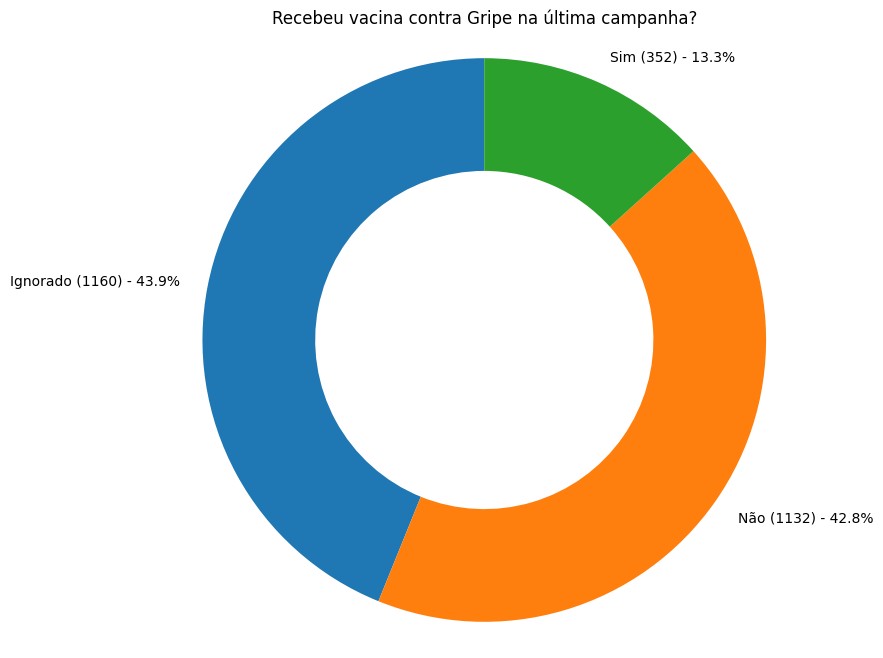

In [9]:
# Plotar gráfico de barras para uma coluna categórica
SRAG['VACINA'] = SRAG['VACINA'].replace({
    1: 'Sim',
    2: 'Não',
    9: 'Ignorado'
})

# Contar os valores de VACINA
contagem_vacina = SRAG['VACINA'].value_counts()

# Criar rótulos personalizados
labels = [f'{cat} ({count}) - {count / contagem_vacina.sum() * 100:.1f}%'
          for cat, count in zip(contagem_vacina.index, contagem_vacina.values)]

# Criar o gráfico de rosca (pie chart com um buraco no meio)
plt.figure(figsize=(8, 8))
plt.pie(contagem_vacina, labels=labels, startangle=90, wedgeprops={'width': 0.4})

# Ajustar a proporção para garantir que o gráfico seja um círculo
plt.axis('equal')

# Adicionar título
plt.title('Recebeu vacina contra Gripe na última campanha?')

# Mostrar o gráfico
plt.show()

In [10]:
#Dos casos em que esteve positivo a classi_fin por infuenza, a vacinação reduziu a taxa de mortalidade?

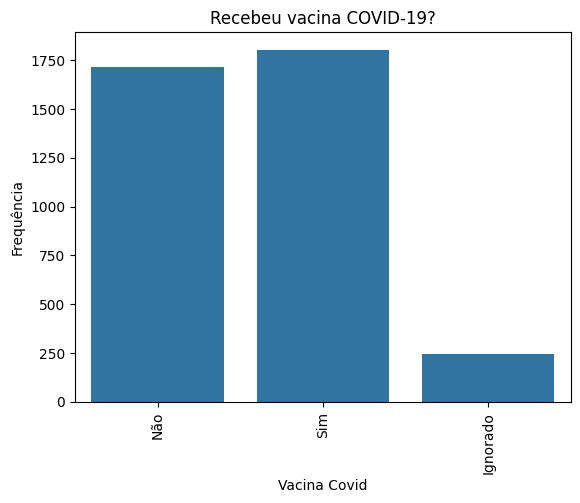

In [ ]:
# Plotar gráfico de barras para uma coluna categórica
SRAG['VACINA_COV'] = SRAG['VACINA_COV'].replace({
    1: 'Sim',
    2: 'Não',
    9: 'Ignorado'
})

# Plotar o gráfico com os novos rótulos
sns.countplot(data=SRAG, x='VACINA_COV')
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x, se necessário
plt.xlabel('Vacina Covid')
plt.ylabel('Frequência')
plt.title('Recebeu vacina COVID-19?')
plt.show()

In [ ]:
#Dos casos em que esteve positivo a classi_fin por covid, a vacinação reduziu a taxa de mortalidade?

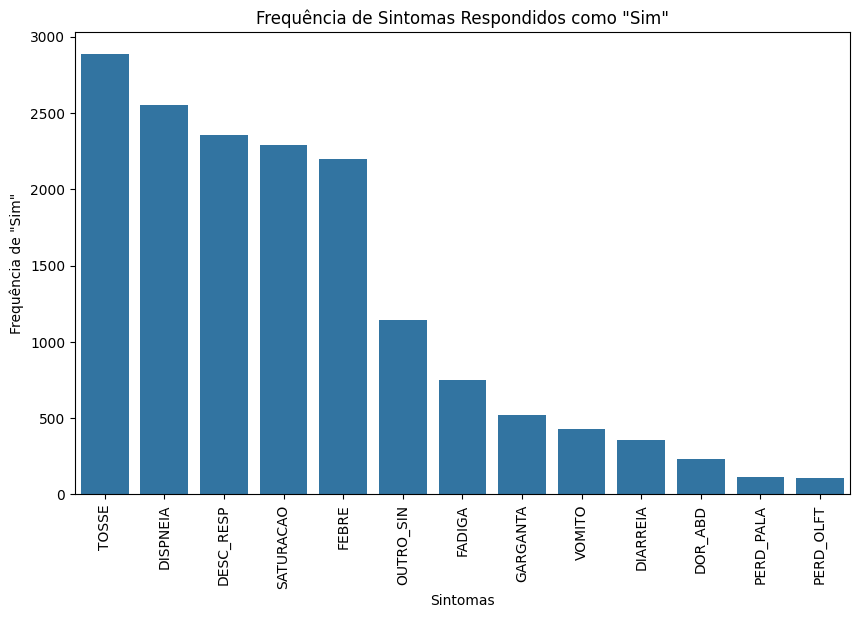

In [ ]:
# Lista das colunas de sintomas
colunas_sintomas = ['DOR_ABD', 'FADIGA', 'FEBRE', 'TOSSE', 'GARGANTA', 'DISPNEIA',
                    'DESC_RESP', 'SATURACAO', 'DIARREIA', 'VOMITO', 'OUTRO_SIN',
                    'PERD_OLFT', 'PERD_PALA']

# Substituir valores numéricos por texto nas colunas de sintomas
SRAG[colunas_sintomas] = SRAG[colunas_sintomas].replace({1: 'Sim', 2: 'Não', 9: 'Ignorado'})

# Contar quantas vezes cada sintoma aparece como "Sim"
frequencia_sintomas = (SRAG[colunas_sintomas] == 'Sim').sum()

# Ordenar por frequência
frequencia_sintomas = frequencia_sintomas.sort_values(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencia_sintomas.index, y=frequencia_sintomas.values)
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x
plt.xlabel('Sintomas')
plt.ylabel('Frequência de "Sim"')
plt.title('Frequência de Sintomas Respondidos como "Sim"')
plt.show()



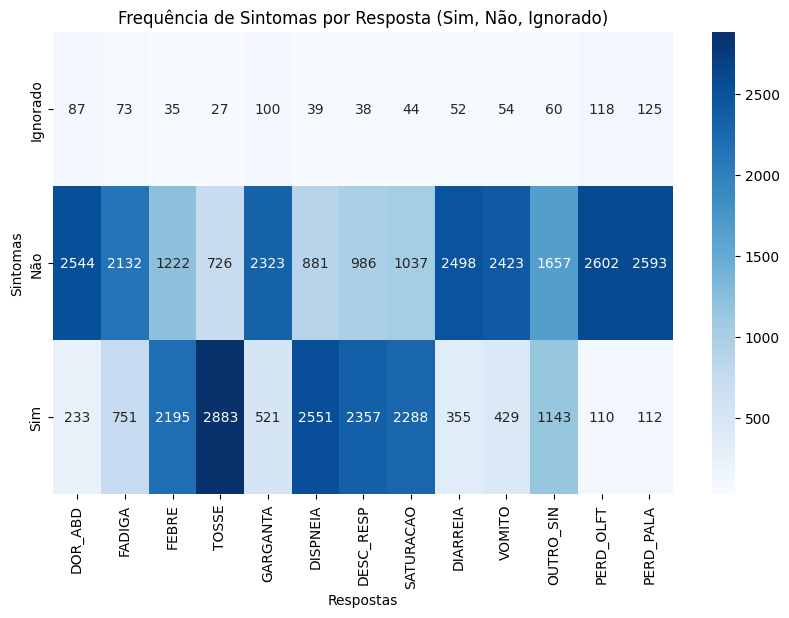

In [ ]:
# Contar as ocorrências de "Sim", "Não" e "Ignorado" para cada sintoma
frequencia_sintomas_detalhado = SRAG[colunas_sintomas].apply(pd.Series.value_counts)

# Criar o heatmap com as frequências
plt.figure(figsize=(10, 6))
sns.heatmap(frequencia_sintomas_detalhado, annot=True, cmap="Blues", cbar=True, fmt='d')

plt.xlabel('Respostas')
plt.ylabel('Sintomas')
plt.title('Frequência de Sintomas por Resposta (Sim, Não, Ignorado)')
plt.show()


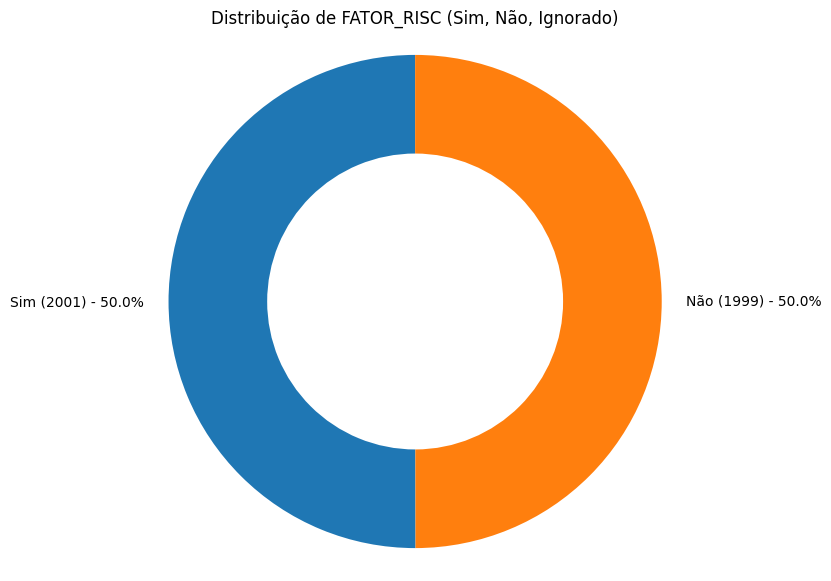

In [21]:
# Substituir os valores 1, 2 e 9 por "Sim", "Não" e "Ignorado"
SRAG['FATOR_RISC'] = SRAG['FATOR_RISC'].replace({1: 'Sim', 2: 'Não', 9: 'Ignorado'})

# Contar os valores únicos na coluna 'FATOR_RISC'
fator_risco_counts = SRAG['FATOR_RISC'].value_counts()

# Criar os rótulos personalizados: categoria, quantidade e porcentagem
labels = [f'{cat} ({count}) - {count / fator_risco_counts.sum() * 100:.1f}%'
          for cat, count in zip(fator_risco_counts.index, fator_risco_counts.values)]

# Criar o gráfico de rosca (pie chart com um buraco no meio)
plt.figure(figsize=(7, 7))
plt.pie(fator_risco_counts, labels=labels, startangle=90, wedgeprops={'width': 0.4})

# Ajustar a proporção para garantir que o gráfico seja um círculo
plt.axis('equal')

# Adicionar título
plt.title('Distribuição de FATOR_RISC (Sim, Não, Ignorado)')

# Configurar o fundo cinza claro atrás das letras (rótulos)
plt.gca().set_facecolor('lightgray')

# Exibir o gráfico
plt.show()



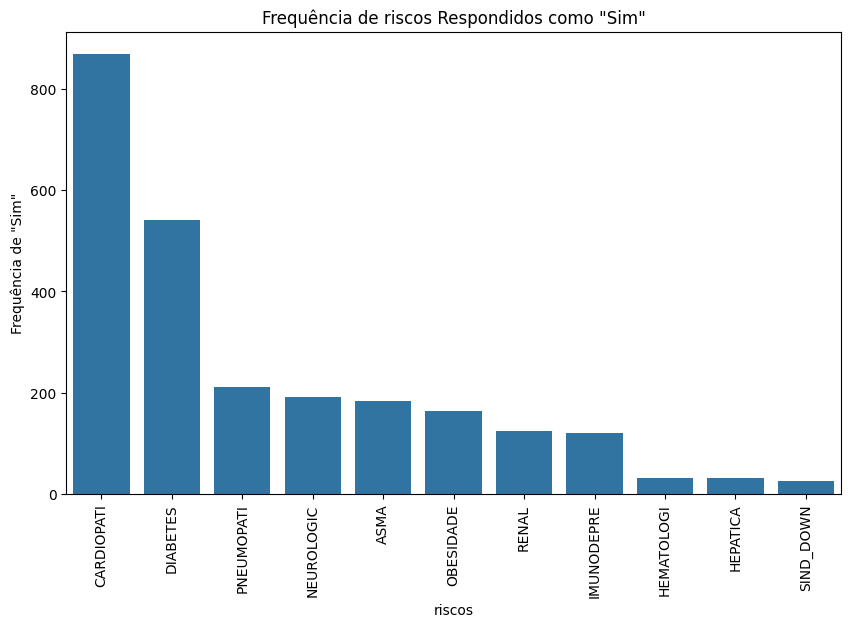

In [20]:
# Lista das colunas de riscos
colunas_riscos = ['CARDIOPATI', 'HEMATOLOGI',	'SIND_DOWN',	'HEPATICA',	'ASMA',	'DIABETES',	'NEUROLOGIC',	'PNEUMOPATI',	'IMUNODEPRE',	'RENAL',	'OBESIDADE']

# Substituir valores numéricos por texto nas colunas de riscos
SRAG[colunas_riscos] = SRAG[colunas_riscos].replace({1: 'Sim', 2: 'Não', 9: 'Ignorado'})

# Contar quantas vezes cada sintoma aparece como "Sim"
frequencia_riscos = (SRAG[colunas_riscos] == 'Sim').sum()

# Ordenar por frequência
frequencia_riscos = frequencia_riscos.sort_values(ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=frequencia_riscos.index, y=frequencia_riscos.values)
plt.xticks(rotation=90)  # Rotacionar os rótulos do eixo x
plt.xlabel('riscos')
plt.ylabel('Frequência de "Sim"')
plt.title('Frequência de riscos Respondidos como "Sim"')
plt.show()

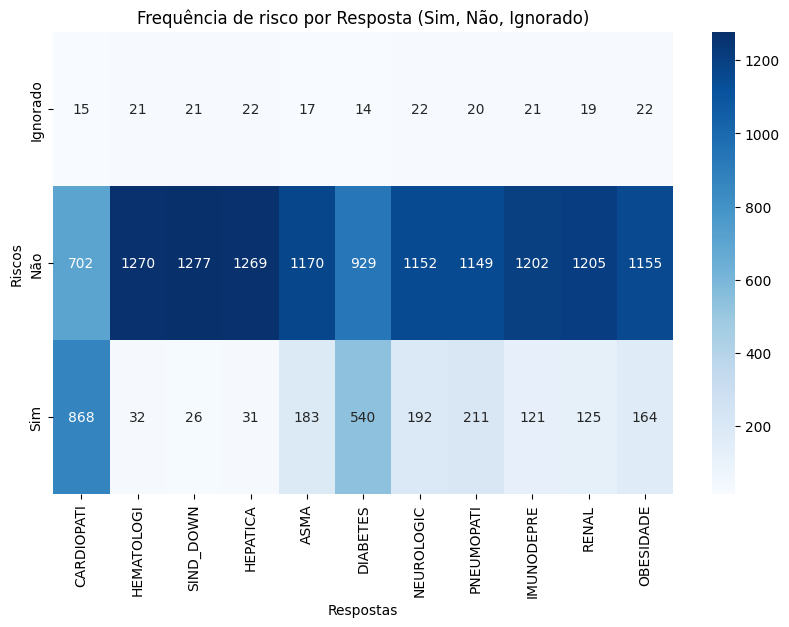

In [ ]:
# Contar as ocorrências de "Sim", "Não" e "Ignorado" para cada risco
frequencia_riscos_detalhado = SRAG[colunas_riscos].apply(pd.Series.value_counts)

# Criar o heatmap com as frequências
plt.figure(figsize=(10, 6))
sns.heatmap(frequencia_riscos_detalhado, annot=True, cmap="Blues", cbar=True, fmt='d')

plt.xlabel('Respostas')
plt.ylabel('Riscos')
plt.title('Frequência de risco por Resposta (Sim, Não, Ignorado)')
plt.show()


<ipython-input-25-50071e78326b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_orbito, x='FATOR_RISC', order=['Sim', 'Não'], palette='Set2')


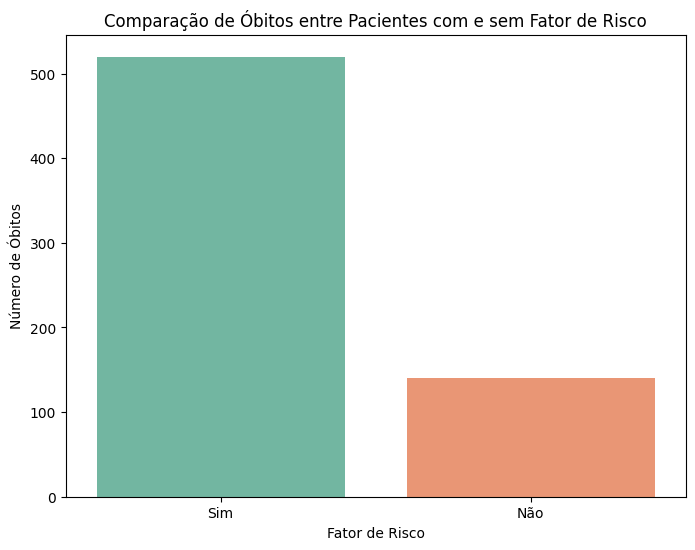

In [25]:
#Pacientes com fator risco possuem mais orbitos do que os sem?

# Criando um gráfico de barras que compara os fatores de risco com o número de óbitos
plt.figure(figsize=(8, 6))
sns.countplot(data=df_orbito, x='FATOR_RISC', order=['Sim', 'Não'], palette='Set2')

plt.title('Comparação de Óbitos entre Pacientes com e sem Fator de Risco')
plt.xlabel('Fator de Risco')
plt.ylabel('Número de Óbitos')
plt.show()


<ipython-input-32-ece8b50d6bf7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=riscos_obitos.index, y=riscos_obitos.values, palette='Set2')


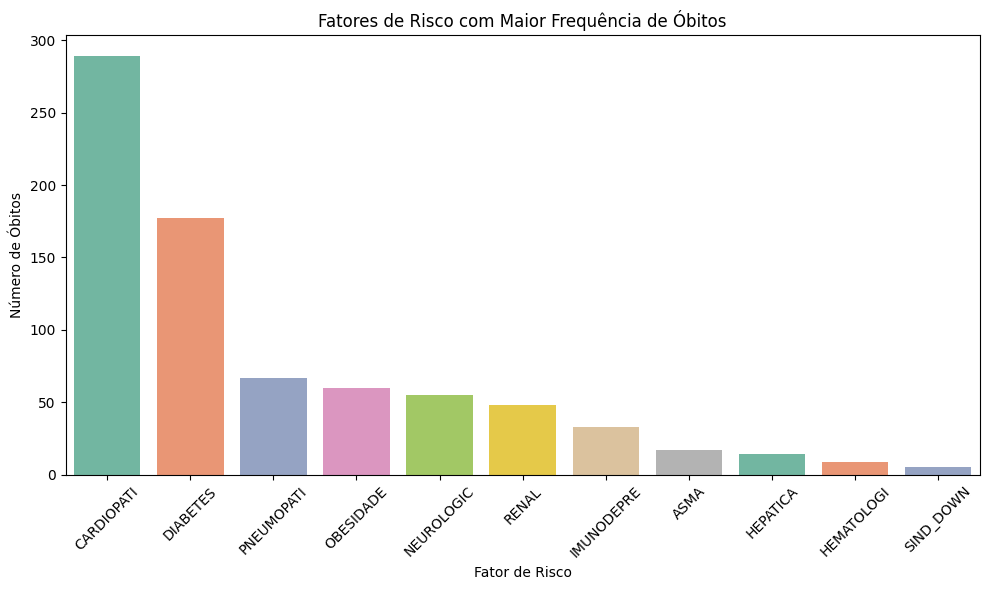

In [32]:
# Contando a frequência de 'Sim' para cada fator de risco entre os óbitos
riscos_obitos = df_orbito[colunas_riscos].apply(lambda x: (x == 'Sim').sum())
riscos_obitos = riscos_obitos.sort_values(ascending=False)

# Criando um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=riscos_obitos.index, y=riscos_obitos.values, palette='Set2')

plt.title('Fatores de Risco com Maior Frequência de Óbitos')
plt.xlabel('Fator de Risco')
plt.ylabel('Número de Óbitos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#Gráfico geografico com os estados com mais casos

In [ ]:
#Meses e anos mais reportados


In [ ]:
#ano com mais morte

In [ ]:
#Pacientes que precisam de UTI ou ventilação mecânica têm maior risco de óbito. Quantos absorveram a doença durante a internação?

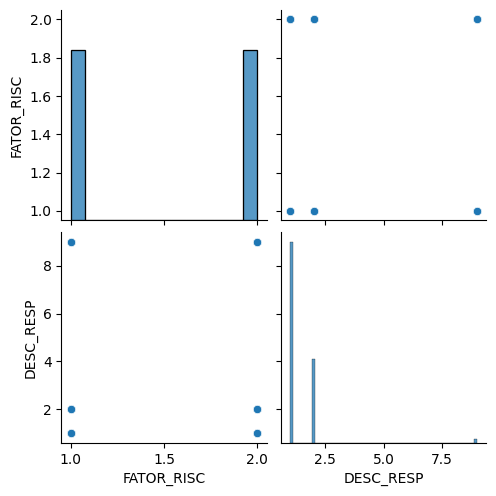

In [ ]:
sns.pairplot(SRAG[['FATOR_RISC', 'DESC_RESP', 'CS_SEXO']])
plt.show()